# Fourier Filter

In this example we'll demonstrate using geocat-comp's [`fourier_filter`](https://geocat-comp.readthedocs.io/en/stable/user_api/generated/geocat.comp.fourier_filters.fourier_filter.html#geocat.comp.fourier_filters.fourier_filter) function to remove high amplitude frequency components from a dataset to allow for visualization of low amplitude signals.

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr

import geocat.datafiles as gdf
from geocat.comp import fourier_filter

## Read in data

We will get the data from the [`geocat-datafiles`](https://github.com/NCAR/geocat-datafiles) package. This package contains example data used in many of the examples for geocat packages.

Then, we use pandas's [`read_csv`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) function to read the data into an xarray [`DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html), then extract just the part we want to graph, the sea surface hight of Point Reyes just outside of San Francisco Bay, measured every 6 minutes.

In [17]:
dataset = xr.DataArray(pd.read_csv(
    gdf.get("ascii_files/CO-OPS_9415020_wl.csv")))
xr_data = dataset.loc[:, 'Verified (ft)']


# Set up variables to use later

We should record a few useful values that reflect our dataset, and the elements in our dataset that we will interact with.

In this example we shall record the frequency at which our data is recorded, and the two primary tidal frequencies that we would like to remove from our data.

We are also preemtively calculating the resolution of our dataset's eventual fast fourier transform, using a relatively simple calculation.

In [18]:
# Set points per hour
data_freq = 10

# Set tide cycle and frequency resolution
tide_freq1 = 1 / (1 * 12.4206)
tide_freq2 = 1 / (2 * 12.4206)
res = data_freq / (len(xr_data))

# Determine our bounds

A tidal signal is a natural signal and will thus have some frequency spread away from the "true" value due to things like bay resonance, the oceanic M2 tidal resonance, and other less easy to explain sources of signal drift.

So we will set some cutoff bounds above and below the center of the signals we want to remove, so that we catch most of those signal components as well.

In [19]:
# Define cutoff_frequency_low and cutoff_frequency_high based on tide frequency
cflow1 = tide_freq1 - res * 5
cfhigh1 = tide_freq1 + res * 5
cflow2 = tide_freq2 - res * 5
cfhigh2 = tide_freq2 + res * 5

# Check our bounds

We can plot the FFT of our data, and the bounds we are considering using to remove the tidal signal.

The lower signal bound set are shown in by red '+' symbols, and the higher set by orange '+' markers.

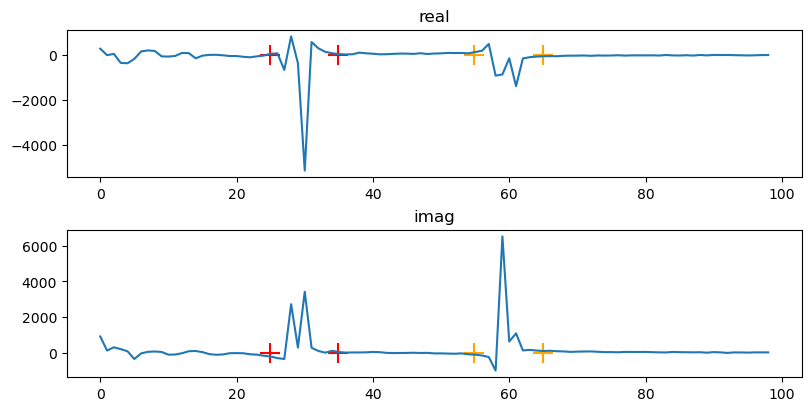

In [61]:
# Generate figure with 2 by 1 subplots and set its size (width, height) in inches
fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Plot the real set of data utilizing NumPy's Fourier Transform function using both
# the original data and the fourier_filter applied to the second set of cutoffs
axs[0].set_title('real')
axs[0].plot(np.real(np.fft.fft(xr_data)[1:100]))
axs[0].scatter([cflow1/res,cfhigh1/res],[0,0], color = 'orange', marker='+', s=200)
axs[0].scatter([cflow2/res,cfhigh2/res],[0,0], color = 'red', marker='+', s=200)

# Plot the imaginary set of data utilizing NumPy's Fourier Transform function using both
# the original data and the fourier_filter applied to the second set of cutoffs
axs[1].set_title('imag')
axs[1].plot(np.imag(np.fft.fft(xr_data)[1:100]))
axs[1].scatter([cflow1/res,cfhigh1/res],[0,0], color = 'orange', marker='+', s=200)
axs[1].scatter([cflow2/res,cfhigh2/res],[0,0], color = 'red', marker='+', s=200)

plt.show()

# Starting the removal

We start by ploting a punch in of the raw signal, where we can see the interaction of the two tidal frequencies, and how they dominate the data.

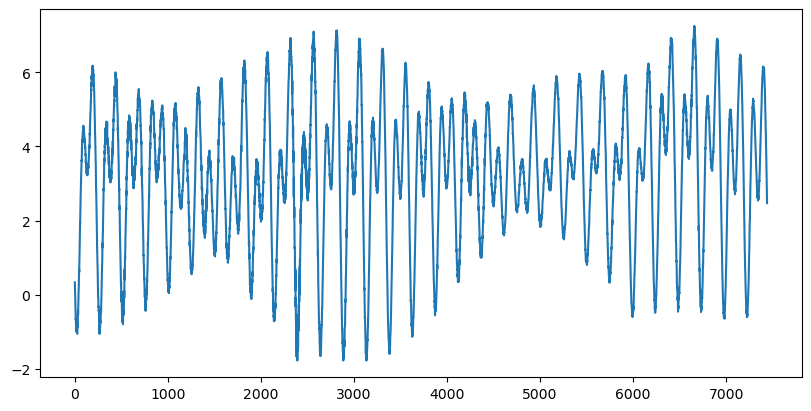

In [67]:
# Generate figure with 1 subplot and set its size (width, height) in inches
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Load signal data and plot it
no_tide = xr_data
ax.plot(no_tide) #[2000:3000])
plt.show()

# Remove the first tidal component

Here we use the fourier filter to remove the first tidal component of 1/12.4206 hours.

And we can see that only one high amplitude frequency remains.

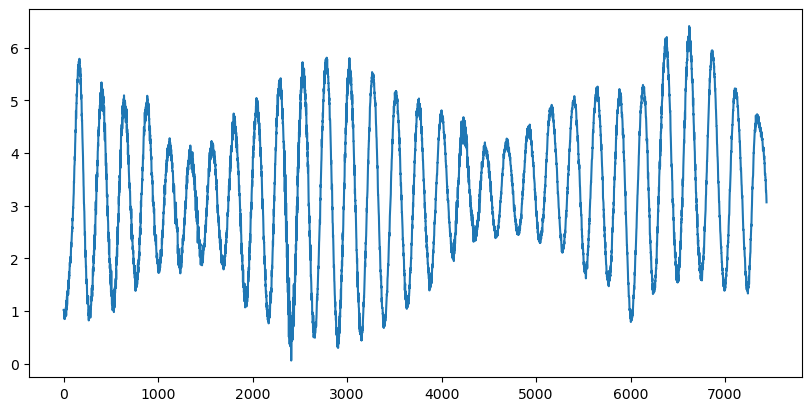

In [68]:
# Generate figure with 1 subplot and set its size (width, height) in inches
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Plot filtered signal data using fourier_filter for the first set of cutoffs
no_tide = fourier_filter(no_tide,
                         data_freq,
                         cutoff_frequency_low=cflow1,
                         cutoff_frequency_high=cfhigh1,
                         band_block=True)
ax.plot(no_tide) #[2000:3000])
plt.show()

# Remove the second tidal component

Here we use the fourier filter to remove the second tidal component of 1/24.8412 hours.

And we can see that no high amplitude frequency remains, while the sea hight, and other signals from wind, and other enviromental forces remain.

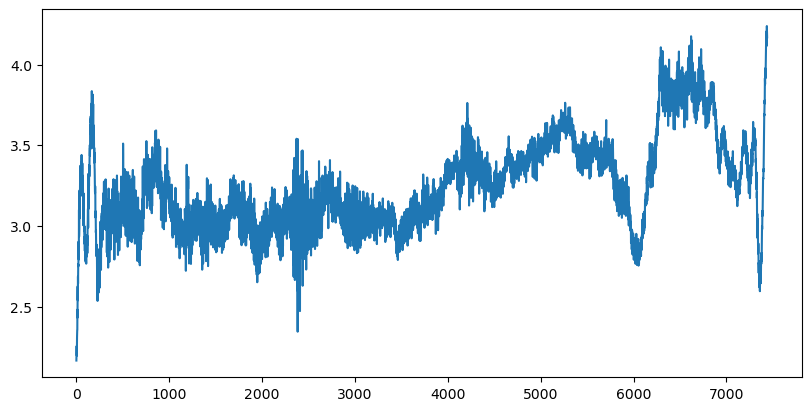

In [69]:
# Generate figure with 1 subplot and set its size (width, height) in inches
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Plot filtered signal data using fourier_filter for the second set of cutoffs
no_tide = fourier_filter(no_tide,
                         data_freq,
                         cutoff_frequency_low=cflow2,
                         cutoff_frequency_high=cfhigh2,
                         band_block=True)
ax.plot(no_tide) #[2000:3000])
plt.show()

# Plot them all together

We can now check our work by plotting the signals simultaniously, to show that they are all the same data, and that our filter hasn't done anything unexpected or undesired.

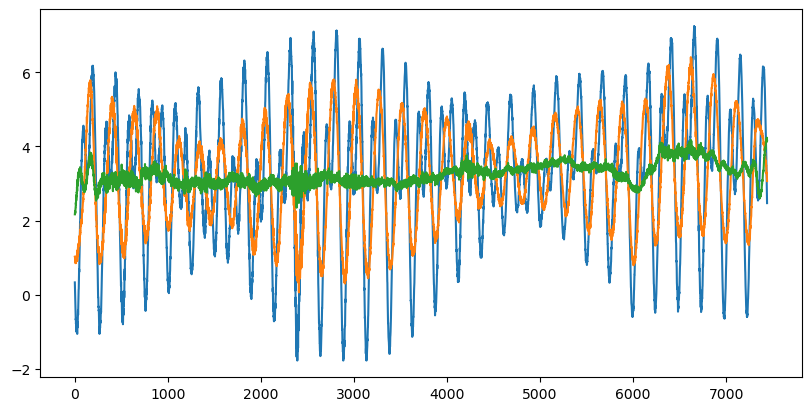

In [66]:

# Generate figure with 1 subplot and set its size (width, height) in inches
fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

no_tide = xr_data
ax.plot(no_tide) #[2000:3000])

no_tide = fourier_filter(no_tide,
                         data_freq,
                         cutoff_frequency_low=cflow1,
                         cutoff_frequency_high=cfhigh1,
                         band_block=True)
ax.plot(no_tide) #[2000:3000])

no_tide = fourier_filter(no_tide,
                         data_freq,
                         cutoff_frequency_low=cflow2,
                         cutoff_frequency_high=cfhigh2,
                         band_block=True)
ax.plot(no_tide) #[2000:3000])

plt.show()

# Plot the FFT

Here we will plot the FFT of the final result against the FFT of the raw signal, to show that we have successfully removed the tidal signals by looking at the frequency space of the signal.

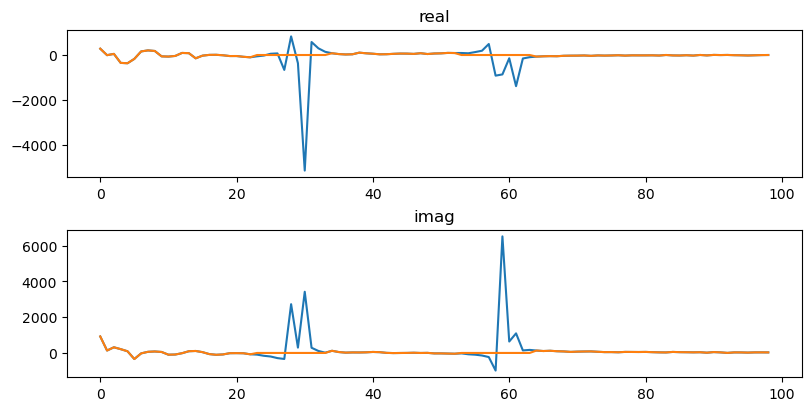

In [65]:
# Generate figure with 2 by 1 subplots and set its size (width, height) in inches
fig, axs = plt.subplots(2, 1, dpi=100, figsize=(8, 4), constrained_layout=True)

# Plot the real set of data utilizing NumPy's Fourier Transform function using both
# the original data and the fourier_filter applied to the second set of cutoffs
axs[0].set_title('real')
axs[0].plot(np.real(np.fft.fft(xr_data)[1:100]))
axs[0].plot(np.real(np.fft.fft(no_tide)[1:100]))

# Plot the imaginary set of data utilizing NumPy's Fourier Transform function using both
# the original data and the fourier_filter applied to the second set of cutoffs
axs[1].set_title('imag')
axs[1].plot(np.imag(np.fft.fft(xr_data)[1:100]))
axs[1].plot(np.imag(np.fft.fft(no_tide)[1:100]))

# Show figure
plt.show()